<a href="https://colab.research.google.com/github/Huang-23/Huang-23.github.io/blob/master/B0729063_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ThinkDSP

This notebook contains solutions to exercises in Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 1

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### Solution

以下測試音檔來自http://www.freesound.org/people/Dublie/sounds/170255/

若找不到此音檔則用wget去抓

In [ ]:
if not os.path.exists('120994__thirsk__120-oboe.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/120994__thirsk__120-oboe.wav

載入函式庫

In [ ]:
from thinkdsp import read_wave

wave= read_wave('120994__thirsk__120-oboe.wav')

#wave.framerate
#wave.ys.size
#wave.ys


音波圖如下

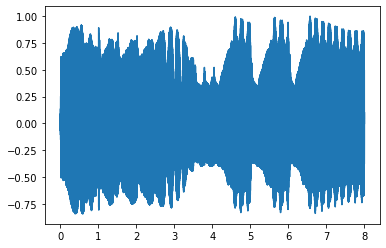

In [ ]:
wave.duration #sec
wave.plot()

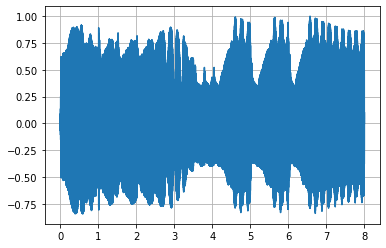

In [ ]:
wave.duration #sec
wave.plot()
import matplotlib.pyplot as pl
pl.grid(True)

In [ ]:
wave.normalize??

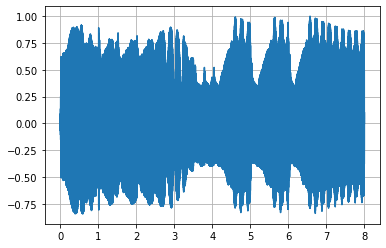

In [ ]:
wave.plot()
pl.grid()

以下為整個波的樣子

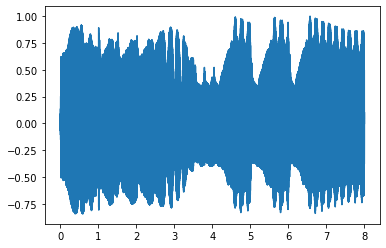

In [ ]:
wave.plot()

選取一從1.1秒為期0.3秒的片段並建立音檔如下

In [ ]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

該區間片段波形圖如下


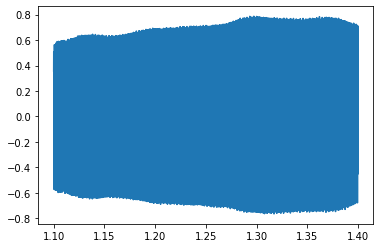

In [ ]:
segment.plot()

選擇更短的片段(從1.1秒為期0.005秒)可以看到更明顯的波形

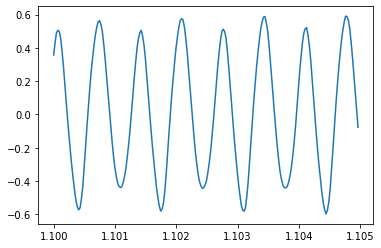

In [ ]:
segment.segment(start=1.1, duration=0.005).plot()

將音頻轉為只允許小於7000的頻譜如下所示

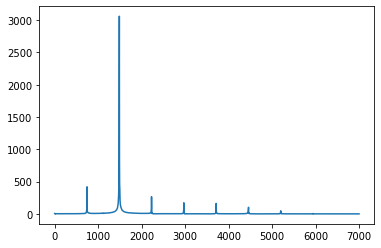

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

它具有很多頻率分量

接下來放大基本頻率和主導頻率

將音頻轉為只允許小於1000的頻譜

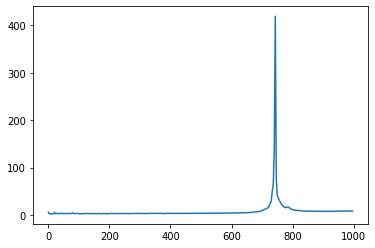

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

`peaks` 按降序印出頻譜及其頻率中的最高點

In [ ]:
spectrum.peaks()[:30]

[(3059.7456640449163, 1486.6666666666667),
 (2214.3512599357155, 1483.3333333333335),
 (843.539743526795, 1480.0),
 (796.8478505628759, 1490.0),
 (534.0258239723073, 1476.6666666666667),
 (444.4740794848263, 1493.3333333333335),
 (419.40695516366804, 743.3333333333334),
 (405.9310377750435, 1496.6666666666667),
 (368.26375511237126, 1473.3333333333335),
 (285.1338382720784, 1470.0),
 (265.86562833677675, 2226.666666666667),
 (256.8046515196013, 1500.0),
 (213.82048967606366, 1466.6666666666667),
 (206.1456787010167, 1503.3333333333335),
 (196.23562957800388, 1463.3333333333335),
 (172.22386712846878, 2970.0),
 (165.75324823814384, 1506.6666666666667),
 (162.83411487936155, 3713.3333333333335),
 (162.80867700360668, 1460.0),
 (146.80143043313262, 1510.0),
 (142.30331117291294, 1456.6666666666667),
 (140.20261803617637, 2230.0),
 (139.86352955954698, 740.0),
 (132.5844947290313, 1513.3333333333335),
 (130.89765877623034, 1453.3333333333335),
 (118.44235548387414, 1516.6666666666667),
 (1

接下來過濾掉高頻

In [ ]:
spectrum.low_pass(2000)

聲音如下

In [ ]:
spectrum.make_wave().make_audio()

透過以下互動，可以選擇一個片段並應用不同的過濾器。

如果將截止頻率設置為3400 Hz，則可以模擬在舊式電話線上採樣的聲音。

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Exercise 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solution

將三組頻率區間與振幅設定隨機參數並相加使之產生一人造音頻

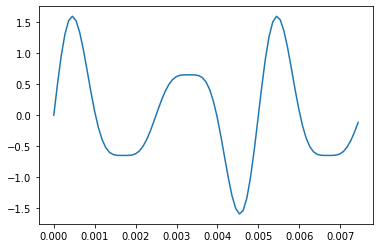

In [ ]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=400, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=800, amp=0.25))
signal.plot()

使用該信號製造一區間為一秒的波，並去除由強度峰周圍的衍射引起的波

In [ ]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

聲音如下

In [ ]:
wave2.make_audio()

這些分量都是200 Hz的倍數，因此會發出連貫的聲音

將音頻轉為只允許小於2000的頻譜

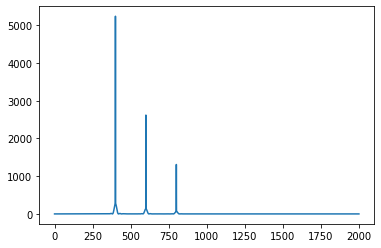

In [ ]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

如果添加的分量不是200 Hz的倍數，會聽到不同的音調

將訊號加入音頻為450的音頻，生成音波並建立音檔

In [ ]:
signal += SinSignal(freq=450)
signal.make_wave().make_audio()

### Exercise 3

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solution

再次使用相同音檔做測試

將音檔正規化，並產生音檔

In [ ]:
wave3 = read_wave('120994__thirsk__120-oboe.wav')
wave3.normalize()
wave3.make_audio()

波形圖如下圖所示

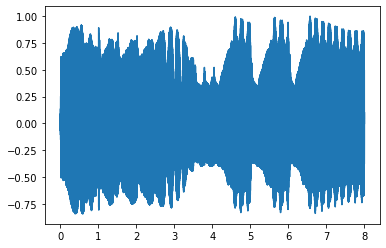

In [ ]:
wave3.plot()

以下是`stretch`函式的實現

In [ ]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

將其加速2倍時的聲音如下

In [ ]:
stretch(wave3, 0.5)
wave3.make_audio()

加速後波形圖如下圖所示（ts有正確更新）

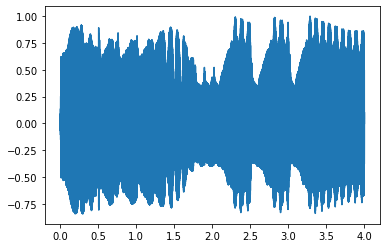

In [ ]:
wave3.plot()